In [52]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt


In [36]:
# Path to the directory containing the .txt files
files_path = 'data/full_pubmed_raw/'
headers = ["PMID", "Year", "Journal", "Title", "AbstractText", "DOI"]

# Get a list of all .txt files in the directory
file_list = glob.glob(os.path.join(files_path, '*.txt'))

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop over each file and read it into a DataFrame
for file_path in file_list:
    if os.path.getsize(file_path) == 0:
        print(f"Skipping zero-byte file: {file_path}")
        continue
    # Assuming the .txt files are tab-separated; adjust delimiter as needed
    df = pd.read_csv(file_path, sep='^', names=headers, on_bad_lines='skip')  # Change 'sep' if files use a different delimiter
    # Check if the DataFrame is empty and skip if so
    df_list.append(df)  # Append each DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
all_data_df = pd.concat(df_list, ignore_index=True)

Skipping zero-byte file: data/full_pubmed_raw/pmid_contents_chunk_498.txt


In [70]:
all_data_df['Year'] = pd.to_numeric(all_data_df['Year'], errors='coerce')#.astype(int)


In [72]:
all_data_df.shape

(2445407, 6)

In [74]:
all_data_df.head()

,PMID,Year,Journal,Title,AbstractText,DOI
0,15008584,2004.0,Pediatric clinics of North America,Neurologic disorders masquerading as pediatric...,Neurologic disorders may present or masquerade...,10.1016/s0031-3955(03)00180-9
1,15008585,2004.0,Pediatric clinics of North America,Pediatric sleep pharmacology: you want to give...,There is a need for greater information about ...,10.1016/s0031-3955(03)00179-2
2,15008586,2004.0,Pediatric clinics of North America,Nonpharmacologic treatments for pediatric slee...,Because of the high prevalence of sleep proble...,10.1016/s0031-3955(03)00178-0
3,15008589,2004.0,Pediatric clinics of North America,Neurocognitive dysfunction and sleep in childr...,"Sleep disturbance in children, whether because...",10.1016/s0031-3955(03)00184-6
4,15008590,2004.0,Pediatric clinics of North America,Sleep problems in children with common medical...,Sleep problems are common in many pediatric me...,10.1016/s0031-3955(03)00185-8


In [60]:
# DataFrame with rows where 'AbstractText' is empty or NaN
df_empty_abstracts = all_data_df[all_data_df['AbstractText'].isna()]

# DataFrame with rows where 'AbstractText' is not empty
df_non_empty_abstracts = all_data_df[all_data_df['AbstractText'].notna()]


In [86]:
percentage_empty = (len(df_empty_abstracts) / (len(df_empty_abstracts)+len(df_non_empty_abstracts))) * 100
percentage_empty

22.386498443817327

In [84]:
df_empty_abstracts_before_2000 = df_empty_abstracts[df_empty_abstracts['Year'] < 2000]

# Calculate the percentage
percentage_empty_before_2000 = (len(df_empty_abstracts_before_2000) / len(df_empty_abstracts)) * 100
percentage_empty_before_2000

56.09572538410532

In [61]:
df_empty_abstracts.shape, df_non_empty_abstracts.shape

((547441, 6), (1897966, 6))

In [64]:
df_empty_abstracts

,PMID,Year,Journal,Title,AbstractText,DOI
5,15008618,2004.0,Mayo Clinic proceedings,Effects of a low-carbohydrate diet.,NaN,10.4065/79.3.431
6,15008619,2004.0,Mayo Clinic proceedings,Effects of a low-carbohydrate diet.,NaN,10.4065/79.3.431-a
10,15008639,2004.0,Mental retardation,Use of the Minnesota multiphasic personality i...,NaN,10.1352/0047-6765(2004)42<151:UOTMMP>2.0.CO;2
11,15008640,2004.0,Mental retardation,Nirje's Eight Planks.,NaN,10.1352/0047-6765(2004)42<147:NEP>2.0.CO;2
26,15008744,2004.0,BJU international,Diagnostic potential unmasked.,NaN,10.1111/j.1464-410x.2003.04700.x
...,...,...,...,...,...,...
2445383,15285206,2004.0,European journal of health law,"ECHR 2004/5 case of Rakevich v. Russia, 28 Oct...",NaN,NaN
2445387,15285210,2004.0,Administration and policy in mental health,Harm reduction: a historic parallel and parable.,NaN,10.1023/b:apih.0000028897.89690.9a
2445388,15285211,2004.0,Administration and policy in mental health,Self-help groups in Hong Kong.,NaN,10.1023/b:apih.0000028898.11943.53
2445390,15285278,2004.0,Alternative therapies in health and medicine,Cochrane for CAM providers: evidence for action.,NaN,NaN


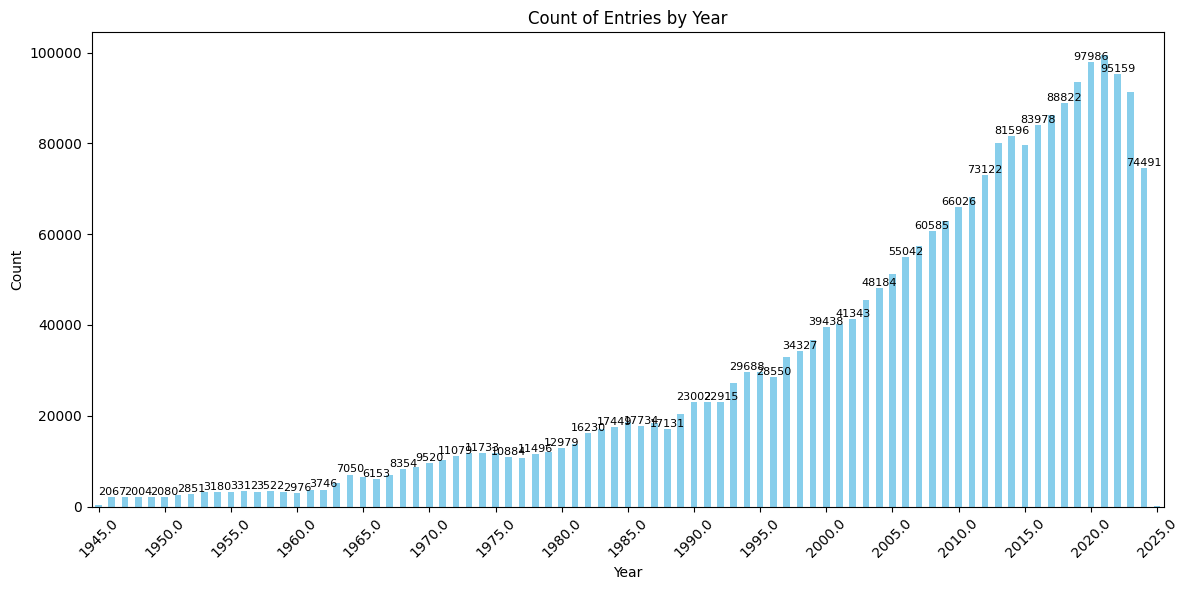

In [80]:
# Group by 'Year' and count entries per year
year_counts = all_data_df['Year'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = year_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Entries by Year')
plt.xticks(rotation=45)

# Set x-axis to display ticks every 5 years
ax.set_xticks(range(0, len(year_counts), 5))
ax.set_xticklabels([str(year) for year in year_counts.index[::5]])

# Add labels on top of each bar
for i, count in enumerate(year_counts):
    if i%2==0:
        continue
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

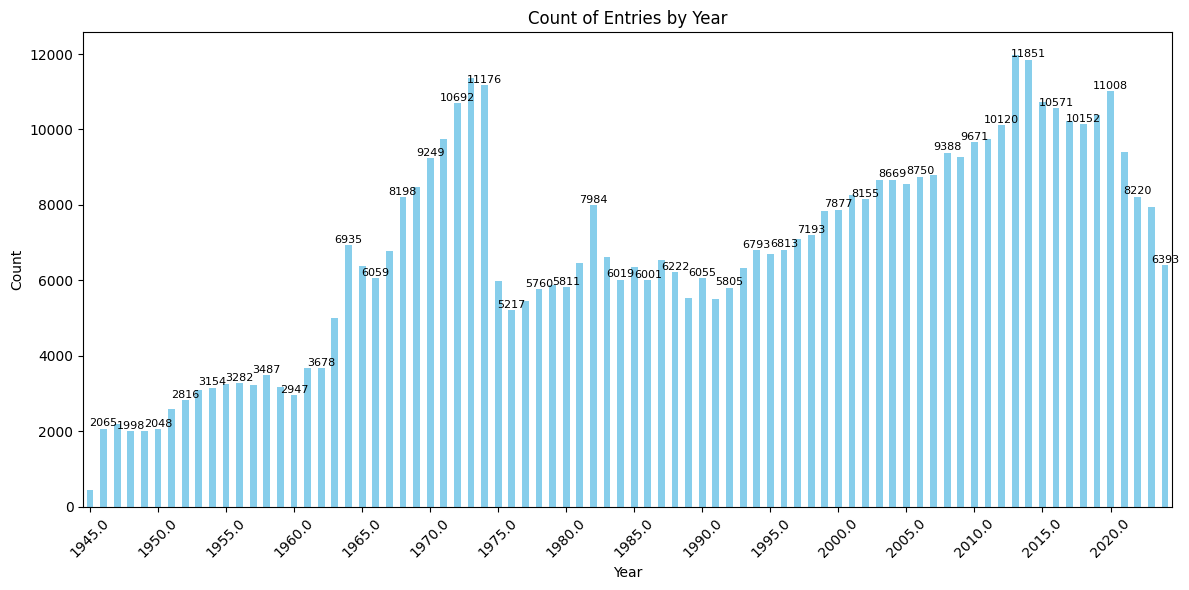

In [82]:
# Group by 'Year' and count entries per year
year_counts = df_empty_abstracts['Year'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = year_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Entries by Year')
plt.xticks(rotation=45)

# Set x-axis to display ticks every 5 years
ax.set_xticks(range(0, len(year_counts), 5))
ax.set_xticklabels([str(year) for year in year_counts.index[::5]])

# Add labels on top of each bar
for i, count in enumerate(year_counts):
    if i%2==0:
        continue
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

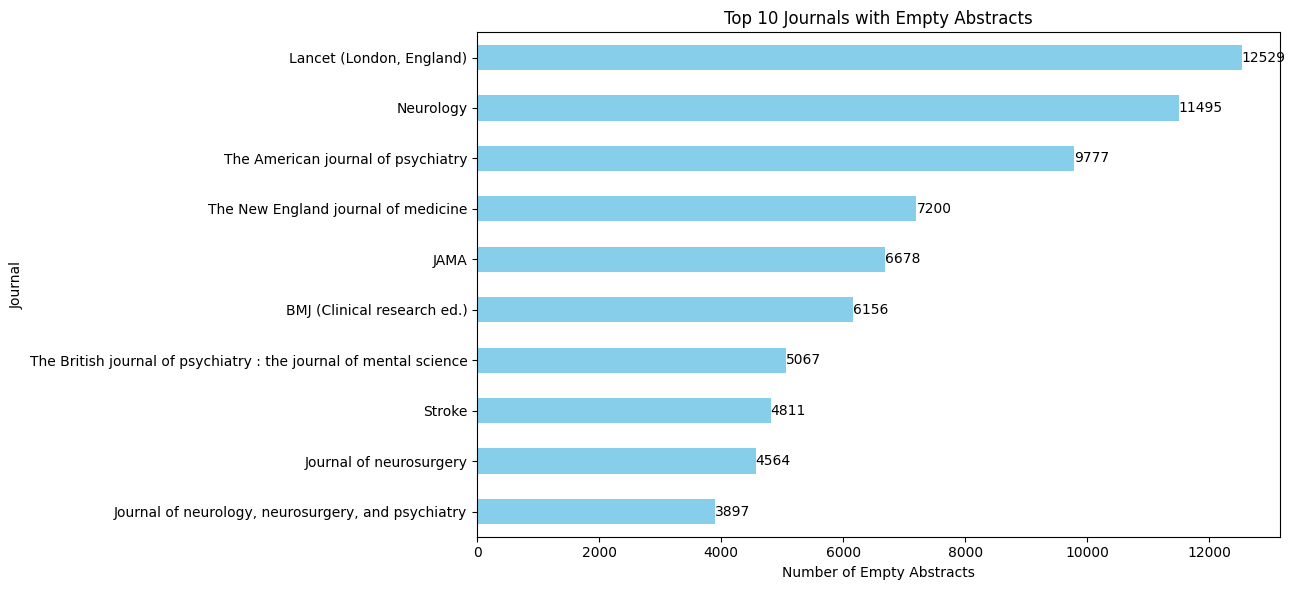

In [94]:
# Get the top 10 journals with the most empty abstracts
top_journals = df_empty_abstracts['Journal'].value_counts().head(10).sort_values()

# Plot the bar chart
plt.figure(figsize=(13, 6))
ax = top_journals.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Empty Abstracts')
plt.ylabel('Journal')
plt.title('Top 10 Journals with Empty Abstracts')

# Add the count labels on the bars
for i, count in enumerate(top_journals):
    ax.text(count + 1, i, str(count), va='center')

plt.tight_layout()
plt.show()